# SIO_READ
This notebook shows how to read in ".sio" files for analysis in Python.

In [1]:
import sys
sys.path.append("/Users/williamjenkins/Research/Code/TritonOA/")

from matplotlib import pyplot as plt

from TritonOA.io.sioread import sioread, SioStream

Specify parameters for reading in the file:
<br>`fname` : Path to ".sio" file
<br>`s_start` : Sample # to begin reading (default is 1). Must be an integer multiple of the record number. To get the record number you can run the script with s_start = 1 and then check the header for the info.
<br>`Ns` : Total # of samples to read (default all)
<br>`channels` : Which channels to read (default all) (INDEXES AT 0). Channel -1 returns header only, X is empty
<br>`inMem` : Perform data parsing in ram (default true). False - Disk intensive, memory efficient; Blocks read sequentially, keeping only requested channels; not yet implemented. True  - Disk efficient, memory intensive; all blocks read at once, requested channels are selected afterwards.

In [27]:
fname = "/Users/williamjenkins/Documents/SIO/Courses/SIOC241 Adv Signal Processing/SWellEx96/J1312340.hla.north.sio"
# s_start = 1
# Ns = 2000
channels = list([-1])
# inMem = True

The following returns a Numpy array containing the data and a header containing the metadata.

In [28]:
kwargs = {
    "fname": fname,
#     "s_start": s_start,
#     "Ns": Ns,
    "channels": channels,
#     "inMem": inMem
}
[X, hdr] = sioread(**kwargs)
print(hdr)

{'ID': 10, 'Nr': 64800, 'BpR': 8192, 'Nc': 27, 'BpS': 2, 'tfReal': 0, 'SpC': 9830400, 'RpC': 2400, 'SpR': 4096, 'fname': (b'qq                     \x00',), 'comment': (b'"AODS Tape E059"                                                       \x00',), 'bs': 32677, 'Description': '\n                    ID= ID Number\n                    Nr  = # of Records in File\n                    BpR = # of Bytes per Record\n                    Nc  = # of channels in File\n                    BpS = # of Bytes per Sample\n                    tfReal = 0 - integer, 1 - real\n                    SpC = # of Samples per Channel\n                    fname = File name\n                    comment= Comment String\n                    bs  = Endian check value, should be 32677\n                    '}


The following returns an SioStream data object which implements indexing and returns sequential data. Indexing starts at 0, but sioread indexes at 1, so 1 is added to all keys.

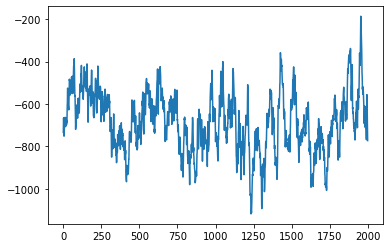

In [36]:
stream = SioStream(fname)
data = stream[0:2000][:,4]

plt.plot(data)
plt.show()